# Hindi Letter Classification

This data consists of 10 directories each consisting of about 2000 images of handrwitten hindi letter i.e there are 10 letters that we need to classify using CNN model.

In [ ]:
#importing pre-requisites
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import numpy as np

In [ ]:
#showing label names
import os
folders = os.listdir('/content/drive/MyDrive/DevanagariHandwrittenCharacterDataset/Train/')
labels = []
for folder in folders:
  label = folder.split('_')[-1]
  labels.append(label)
labels

['ja', 'kha', 'cha', 'chha', 'ga', 'yna', 'gha', 'kna', 'jha', 'ka']

# Loading train and test data

In [ ]:
IMAGE_SIZE=[32,32]
train_path='/content/drive/MyDrive/DevanagariHandwrittenCharacterDataset/Train'
test_path='/content/drive/MyDrive/DevanagariHandwrittenCharacterDataset/Test'

In [ ]:
import os
import cv2
import numpy as np

x_train = []
y_train = []
x_test = []
y_test = []

for folder in os.listdir(train_path):
  
  label = folder.split('_')[-1]

  for filename in os.listdir(os.path.join(train_path, folder)):
    img = cv2.imread(os.path.join(train_path, folder, filename))
    img = cv2.resize(img, IMAGE_SIZE)

    x_train.append(img)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

for folder in os.listdir(test_path):
 
  label = folder.split('_')[-1]

  for filename in os.listdir(os.path.join(test_path, folder)):
   
    img = cv2.imread(os.path.join(test_path, folder, filename))
    img = cv2.resize(img, IMAGE_SIZE)

    x_test.append(img)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)
np.unique(y_test)

array(['cha', 'chha', 'ga', 'gha', 'ja', 'jha', 'ka', 'kha', 'kna', 'yna'],
      dtype='<U4')

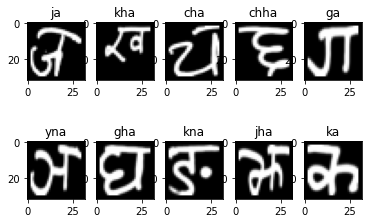

In [ ]:
#Displaying 10 letters along with their labels
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5)

for i, folder in enumerate(os.listdir(train_path)):

  label = folder.split('_')[-1]

  filename = os.listdir(os.path.join(train_path, folder))[0]

  img = cv2.imread(os.path.join(train_path, folder, filename))
  img = cv2.resize(img, IMAGE_SIZE)

  row = i // 5
  col = i % 5
  ax[row, col].imshow(img)
  ax[row, col].set_title(label)

plt.show()


In [ ]:
import tensorflow as tf
unique_labels = set(y_train)

label_map = {old_label: i for i, old_label in enumerate(sorted(unique_labels))}
print(label_map)

y_train = [label_map[label] for label in y_train]
y_test = [label_map[label] for label in y_test]

y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(unique_labels))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(unique_labels))

{'cha': 0, 'chha': 1, 'ga': 2, 'gha': 3, 'ja': 4, 'jha': 5, 'ka': 6, 'kha': 7, 'kna': 8, 'yna': 9}


In [ ]:
import tensorflow as tf
num_classes = len(labels)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=IMAGE_SIZE + [3]))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=20)

scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

predictions = model.predict(x_test)

Epoch 1/20
532/532 [==============================] - 10s 4ms/step - loss: 3.6805 - accuracy: 0.1970
Epoch 2/20
532/532 [==============================] - 2s 4ms/step - loss: 1.9217 - accuracy: 0.2883
Epoch 3/20
532/532 [==============================] - 2s 4ms/step - loss: 1.5649 - accuracy: 0.4506
Epoch 4/20
532/532 [==============================] - 2s 4ms/step - loss: 1.1891 - accuracy: 0.5905
Epoch 5/20
532/532 [==============================] - 2s 4ms/step - loss: 0.9230 - accuracy: 0.6811
Epoch 6/20
532/532 [==============================] - 2s 4ms/step - loss: 0.7362 - accuracy: 0.7570
Epoch 7/20
532/532 [==============================] - 2s 4ms/step - loss: 0.5853 - accuracy: 0.8029
Epoch 8/20
532/532 [==============================] - 2s 4ms/step - loss: 0.4840 - accuracy: 0.8395
Epoch 9/20
532/532 [==============================] - 2s 4ms/step - loss: 0.4095 - accuracy: 0.8622
Epoch 10/20
532/532 [==============================] - 2s 4ms/step - loss: 0.3485 - accuracy: 0.885

In [ ]:
predictions = model.predict(x_test)

predicted_labels = [np.argmax(prediction) for prediction in predictions]

print(predicted_labels)

94/94 [==============================] - 0s 2ms/step
[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 7, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4

In [ ]:
label_map = { 0:'च', 1:'छ',2:'ग', 3:'ध', 4:'ज', 5:'झ', 6:'क', 7:'ख', 8:'ङ', 9:'ञ'}

predicted_labels = [label_map[label] for label in predicted_labels]

print(predicted_labels)

['च', 'च', 'च', 'च', 'च', 'ध', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'ध', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'ध', 'च', 'च', 'ध', 'ध', 'च', 'ध', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'झ', 'च', 'च', 'च', 'च', 'च', 'च', 'ध', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'ख', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च', 'च',

# Predicting New Image

The input image is:



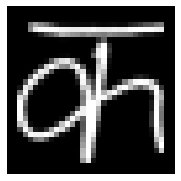

In [ ]:
image = plt.imread('/content/drive/MyDrive/image.png')
plt.figure(figsize=(3, 12))
plt.imshow(image,cmap='gray')
plt.axis('off')
print("The input image is:")
print("")
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/image.png', target_size=(32, 32))
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)
predicted_label = np.argmax(prediction)
#print(predicted_label)
predicted_character = label_map[predicted_label]
from IPython.display import HTML
predicted_letter= '<font size="36">' + str(predicted_character) + '</font>'
print("The predicted letter is:")
HTML(predicted_letter)

1/1 [==============================] - 0s 74ms/step
The predicted letter is:


### We can see that our model has accurately predicted the new handwrittern letter image that was given as the input.

###The model developed for the handwritten letter classification task has achieved a high accuracy of 98% on test data. This is a promising result, indicating that the model is able to accurately classify handwritten letters.

###In conclusion, the model developed for handwritten letter classification has demonstrated good performance, with the potential for practical applications. Further research could focus on improving the model by using additional data or exploring different model architectures or training methods.

In [ ]:
model.save('/content/drive/MyDrive/model.h5')